In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt

In [2]:
url='https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv'
df = pd.read_csv(url, error_bad_lines=False)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
df.shape

(1000, 40)

This data set has 1000 rows and 40 columns

In [4]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


Most of the values in feature_c39 is maximum month they are paid is 479 and minimum is 0.maximum vehicle claim is 79560

checking for null values

In [5]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [6]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

_c39 feature having 100% null data so I'm going to drop it

In [7]:
data=['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39']
for col in data:
    print(col)
    print(df[col].value_counts())
    print()

months_as_customer
194    8
285    7
140    7
230    7
128    7
      ..
347    1
113    1
337    1
117    1
0      1
Name: months_as_customer, Length: 391, dtype: int64

age
43    49
39    48
41    45
34    44
30    42
31    42
38    42
37    41
33    39
32    38
40    38
29    35
46    33
35    32
36    32
42    32
44    32
28    30
45    26
26    26
48    25
47    24
27    24
57    16
25    14
49    14
55    14
50    13
53    13
61    10
24    10
54    10
60     9
51     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
22     1
20     1
19     1
Name: age, dtype: int64

policy_number
116735    1
107181    1
430794    1
115399    1
328387    1
         ..
218456    1
179538    1
357713    1
247116    1
296960    1
Name: policy_number, Length: 1000, dtype: int64

policy_bind_date
01-01-2006    3
28-04-1992    3
05-08-1992    3
29-09-1999    2
09-08-2004    2
             ..
03-10-2000    1
28-11-2002    1
05-06-2011    1
29-10-1991    1
30-03-1999    

collision type,property damage,police report_available has ? value

In [8]:
data_clean=df
data_clean=df.replace("?",np.nan)

Handling Null values

In [9]:
data_clean.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [10]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

The features having null values are object type

In [11]:
data_clean['collision_type'].fillna(data_clean['collision_type'].mode()[0], inplace = True)
data_clean['police_report_available'].fillna(data_clean['police_report_available'].mode()[0], inplace = True)
data_clean['property_damage'].fillna(data_clean['property_damage'].mode()[0], inplace = True)

In [12]:
data_clean.drop('_c39',inplace = True,axis=1)

In [13]:
data_clean.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

(array([0, 1]), <a list of 2 Text xticklabel objects>)

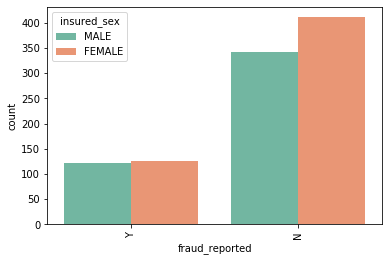

In [14]:
sns.countplot(x=df['fraud_reported'],hue=data_clean['insured_sex'],data=data_clean,palette="Set2")
plt.xticks(rotation=90)

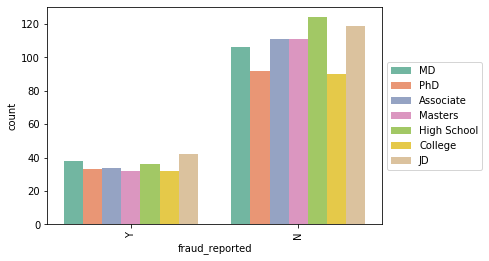

In [15]:
sns.countplot(x=df['fraud_reported'],hue=data_clean['insured_education_level'],data=data_clean,palette="Set2")
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

we cannot using educational qualification

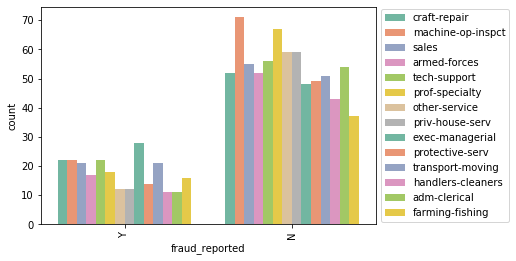

In [16]:
sns.countplot(x=df['fraud_reported'],hue=data_clean['insured_occupation'],data=data_clean,palette="Set2")
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

majority of people who all are doing craft repair are reported as fraud

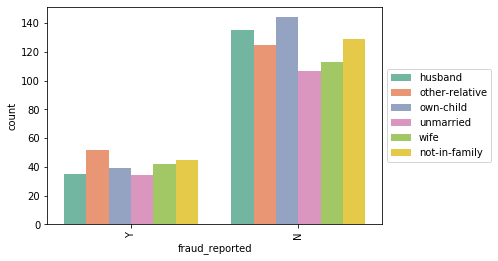

In [17]:
sns.countplot(x=df['fraud_reported'],hue=data_clean['insured_relationship'],data=data_clean,palette="Set2")
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

majority insured member who has other relatives as nomminees are comparitively fraud 

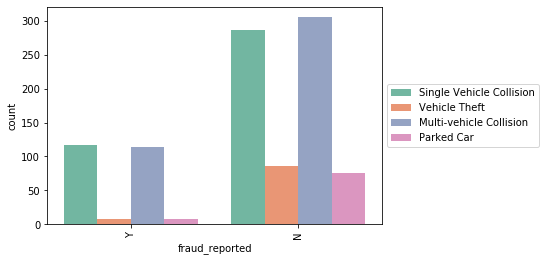

In [18]:
sns.countplot(x=df['fraud_reported'],hue=data_clean['incident_type'],data=data_clean,palette="Set2")
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

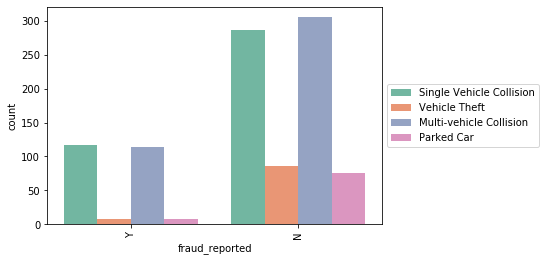

In [19]:
sns.countplot(x=df['fraud_reported'],hue=data_clean['incident_type'],data=data_clean,palette="Set2")
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

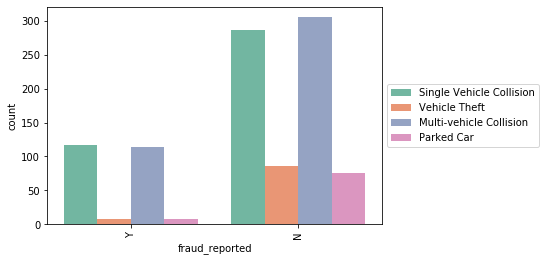

In [20]:
sns.countplot(x=df['fraud_reported'],hue=data_clean['incident_type'],data=data_clean,palette="Set2")
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In order to compensate major damage some times they become fraud

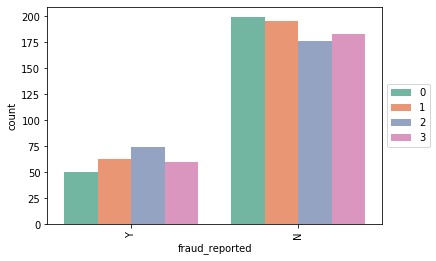

In [21]:
sns.countplot(x=df['fraud_reported'],hue=data_clean['witnesses'],data=data_clean,palette="Set2")
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Eventhough If a case has no witness it is not reported as fraud claim

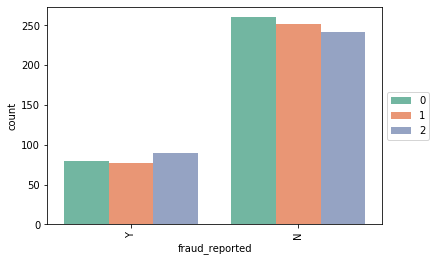

In [22]:
sns.countplot(x=df['fraud_reported'],hue=data_clean['bodily_injuries'],data=data_clean,palette="Set2")
plt.xticks(rotation=90)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [23]:
df_clean=data_clean

In [24]:
cols=['months_as_customer','policy_number','policy_bind_date','insured_zip','incident_date','authorities_contacted']
df_clean=df_clean.drop(cols,axis=1)

dropping features having unique values,date,unwanted information

In [25]:
df_clean.shape

(1000, 33)

In [26]:
df_mod=df_clean
col_encod=['policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation',
                                'insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity','incident_state',
                                'incident_city','incident_location','property_damage','police_report_available','auto_make','auto_model','fraud_reported']
from sklearn import preprocessing 
for col in col_encod:
    label = preprocessing.LabelEncoder()
    df_mod[col]= label.fit_transform(df_clean[col])

In [27]:
df_mod.shape

(1000, 33)

In [28]:
df_mod.dtypes

age                              int64
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_type                    int32
collision_type                   int32
incident_severity                int32
incident_state                   int32
incident_city                    int32
incident_location                int32
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int32
bodily_injuries                  int64
witnesses                        int64
police_report_available          int32
total_claim_amount       

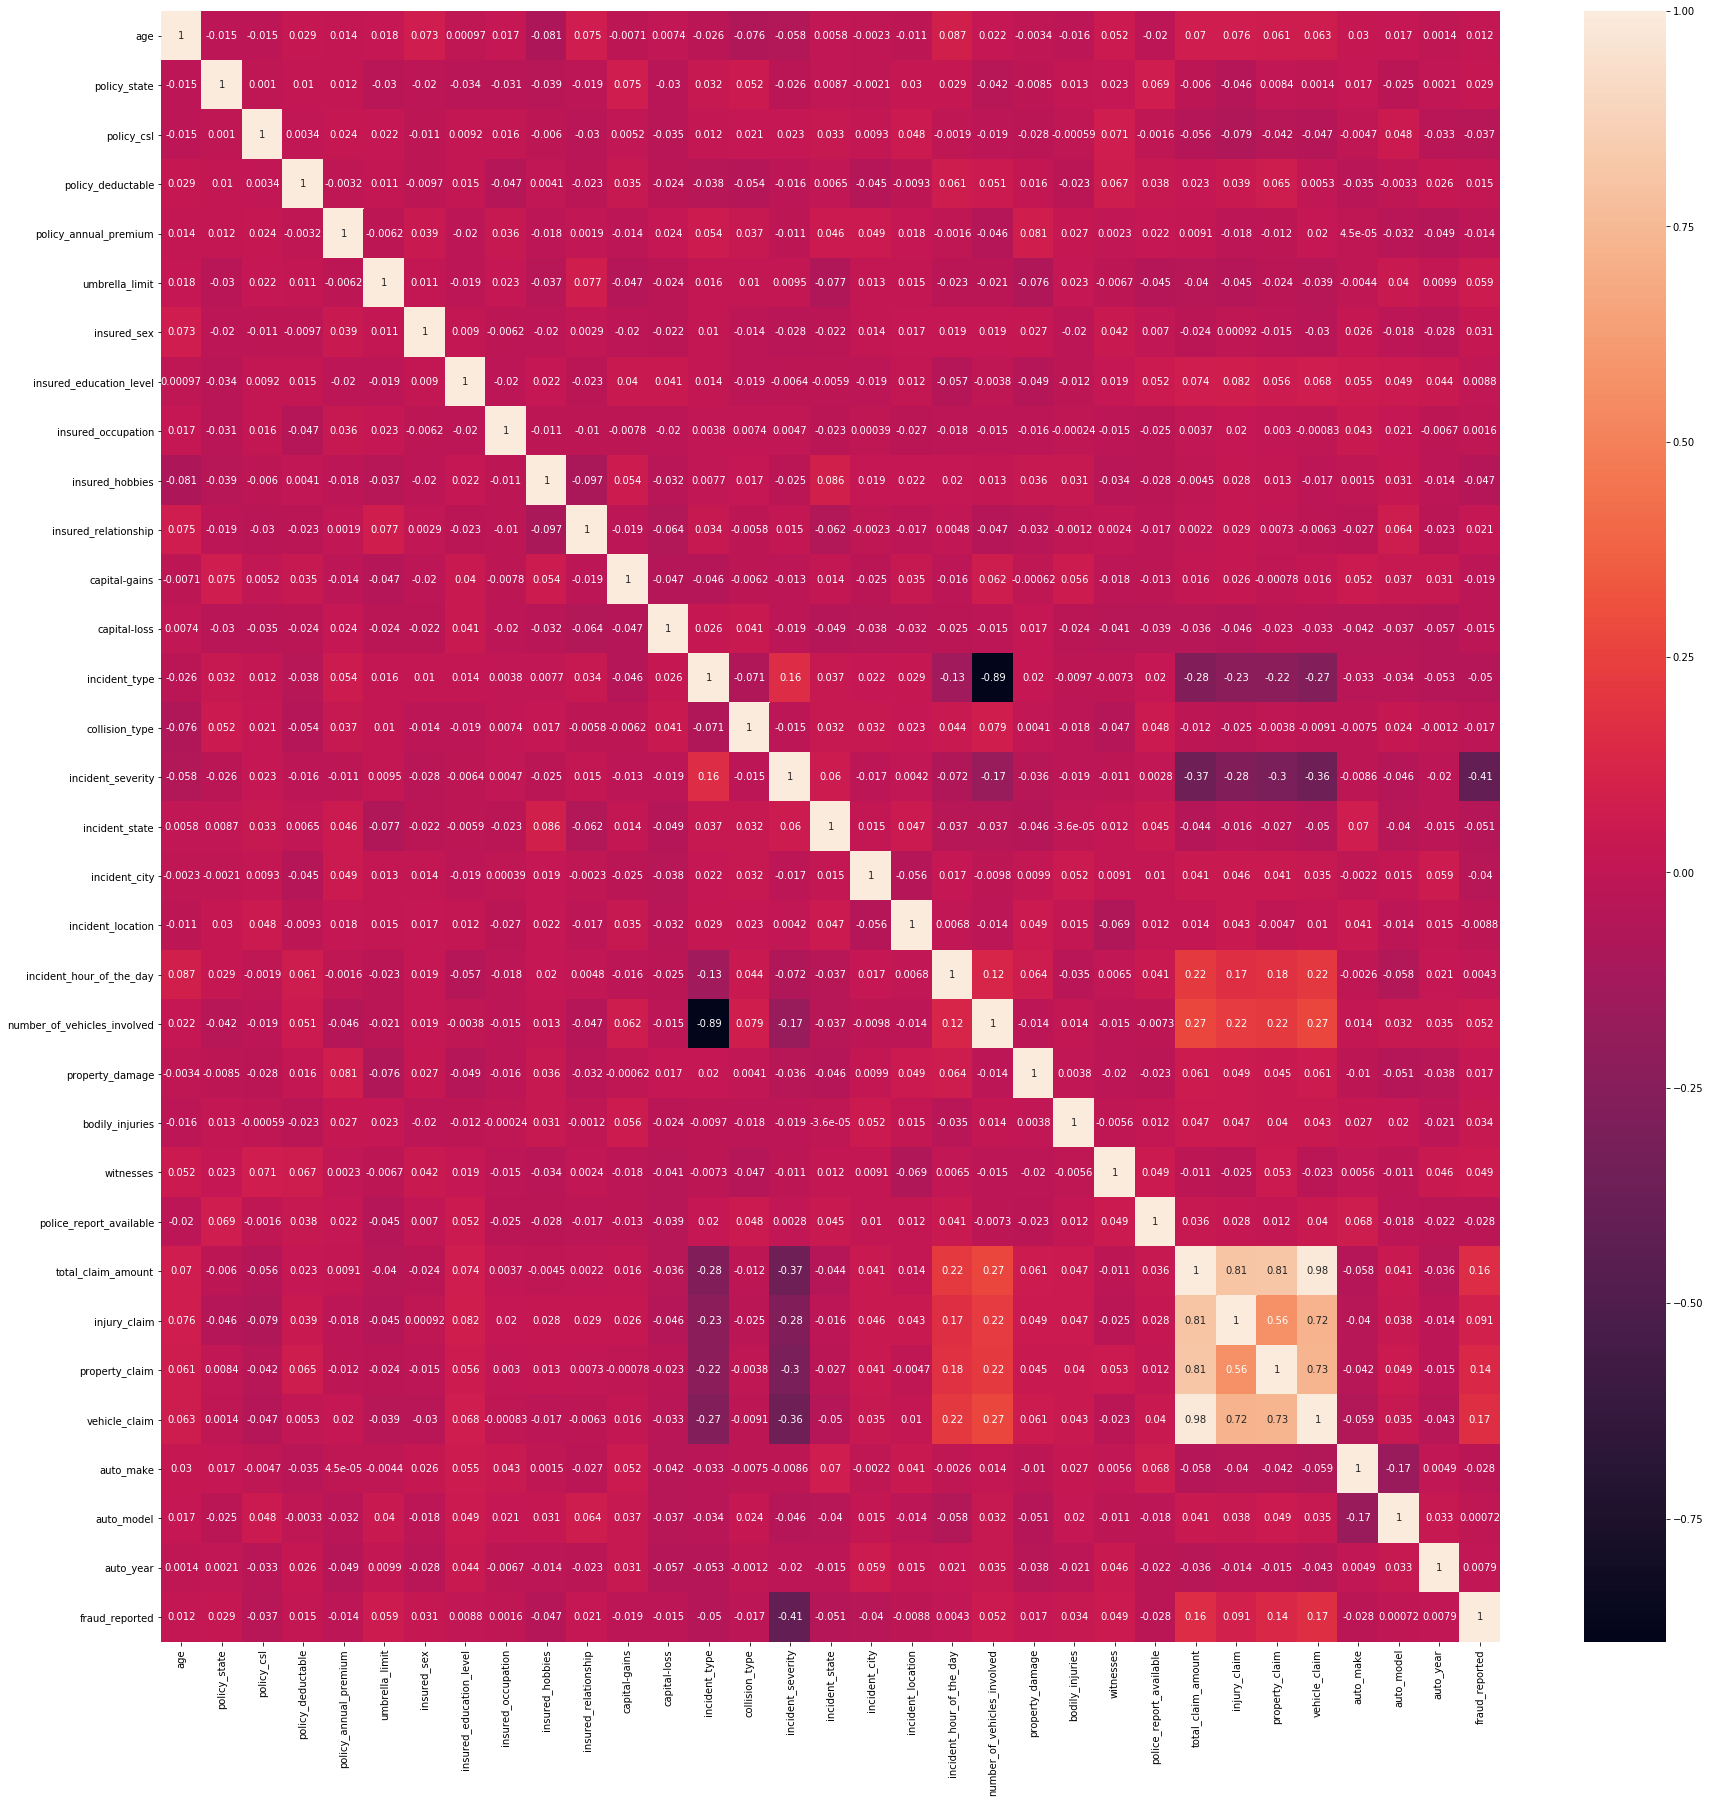

In [29]:
correlation=df_clean.corr(method='pearson')
plt.figure(figsize=(30,30))
sns.heatmap(correlation,annot=True)

incident_severity is highly corelated with fraud_reported

In [30]:
x1=df_clean.drop(['fraud_reported'],axis=1)
y1=df_clean['fraud_reported']

Handling class Imbalance

In [31]:
from imblearn.over_sampling import SMOTE

x1, y1 = SMOTE().fit_resample(x1, y1)

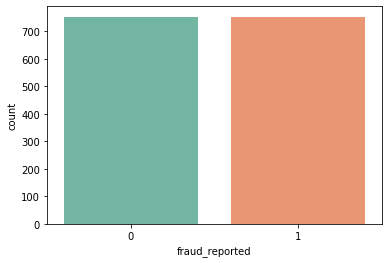

In [32]:
sns.countplot(x=y1,data=df,palette="Set2")

In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled=sc.fit_transform(x1)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn .ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
x=scaled
y=y1

In [35]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.23,random_state=1)

models=[LogisticRegression(),RandomForestClassifier(),KNeighborsClassifier(),GradientBoostingClassifier(),DecisionTreeClassifier()]
scorelist=[]
acclist=[]


In [36]:
def create_model(model):
    m=model
    m.fit(xtrain,ytrain)
    p=m.predict(xtest)
    score=m.score(xtest,ytest)
    result = confusion_matrix(ytest,p)
    result1 = classification_report(ytest,p)
    result2 = accuracy_score(ytest,p)
    scorelist.append(score)
    acclist.append(result2)
    
    
    print(m,"\n")
    
    print('Accuracy score:',score,"\n")
    print('"Confusion Matrix:\n"',result)
    print('classification_report\n',result1)
    print('Average accuracy_score',result2)
    print('---------------------------------------------------------------------------------------------------------')
for i in models:
    create_model(i)

print('Maximun accuracy Score is shown by',models[acclist.index(max(acclist))],max(acclist))


LogisticRegression() 

Accuracy score: 0.792507204610951 

"Confusion Matrix:
" [[143  43]
 [ 29 132]]
classification_report
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       186
           1       0.75      0.82      0.79       161

    accuracy                           0.79       347
   macro avg       0.79      0.79      0.79       347
weighted avg       0.80      0.79      0.79       347

Average accuracy_score 0.792507204610951
---------------------------------------------------------------------------------------------------------
RandomForestClassifier() 

Accuracy score: 0.8731988472622478 

"Confusion Matrix:
" [[161  25]
 [ 19 142]]
classification_report
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       186
           1       0.85      0.88      0.87       161

    accuracy                           0.87       347
   macro avg       0.87      0.87      0.87       3

CROSS VALIDATION

In [37]:
x=scaled
y=y1
scorel=[]

In [38]:
lr=LogisticRegression()
scores=cross_val_score(lr,x,y,cv=5)
scorel.append(scores)
scores

array([0.64900662, 0.70431894, 0.82392027, 0.85714286, 0.86378738])

In [39]:
rf=RandomForestClassifier()
scores=cross_val_score(rf,x,y,cv=5)
scorel.append(scores)
scores

array([0.74172185, 0.8372093 , 0.87707641, 0.94019934, 0.93023256])

In [40]:
kn=KNeighborsClassifier()
scores=cross_val_score(kn,x,y,cv=5)
scorel.append(scores)
scores

array([0.65562914, 0.70431894, 0.71760797, 0.75083056, 0.76744186])

In [41]:
gb=GradientBoostingClassifier()
scores=cross_val_score(gb,x,y,cv=5)
scorel.append(scores)
scores

array([0.72516556, 0.80730897, 0.8538206 , 0.910299  , 0.92026578])

In [42]:
dt=DecisionTreeClassifier()
scores=cross_val_score(dt,x,y,cv=5)
scorel.append(scores)
scores

array([0.6986755 , 0.75415282, 0.81727575, 0.86710963, 0.86378738])

DIFFERENCE

In [43]:
models=[LogisticRegression(),RandomForestClassifier(),KNeighborsClassifier(),GradientBoostingClassifier(),DecisionTreeClassifier()]
for i in range(0,5):
    print(models[i],"difference is",scorel[i]-acclist[i])

LogisticRegression() difference is [-0.14350058 -0.08818827  0.03141306  0.06463565  0.07128017]
RandomForestClassifier() difference is [-0.13147699 -0.03598954  0.00387756  0.06700049  0.05703371]
KNeighborsClassifier() difference is [0.00721415 0.05590395 0.06919299 0.10241558 0.11902687]
GradientBoostingClassifier() difference is [-0.14803328 -0.06588988 -0.01937825  0.03710016  0.04706693]
DecisionTreeClassifier() difference is [-0.14282306 -0.08734574 -0.02422281  0.02561108  0.02228882]


random forest classifier has least difference

In [44]:
from sklearn.model_selection import GridSearchCV
parameters = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[True],
                "n_estimators":[100,300],
                "criterion":["gini"]}
grid = GridSearchCV(RandomForestClassifier(), param_grid = parameters, cv = 5, scoring = "r2")

In [45]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.23,random_state=1)
grid.fit(xtrain,ytrain)

print("Best_parameters",grid.best_params_)

Best_parameters {'bootstrap': True, 'criterion': 'gini', 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 300}


MODELING USING BEST PARAMETERS

In [46]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.23,random_state=1)
model =RandomForestClassifier(criterion='gini',max_features=1,min_samples_leaf=1,min_samples_split=3,n_estimators=300)
model.fit(xtrain,ytrain)
model.score(xtest,ytest) 
y_pred_1 = model.predict(xtest)
result = confusion_matrix(ytest, y_pred_1)
print("Confusion Matrix:")
print(result)
result1 = classification_report(ytest, y_pred_1)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(ytest,y_pred_1)
print("Accuracy:",round(result2,2))

Confusion Matrix:
[[164  22]
 [ 19 142]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       186
           1       0.87      0.88      0.87       161

    accuracy                           0.88       347
   macro avg       0.88      0.88      0.88       347
weighted avg       0.88      0.88      0.88       347

Accuracy: 0.88


ROC AUC CURVE

No Skill: ROC AUC=0.500
Randomforest: ROC AUC=0.882


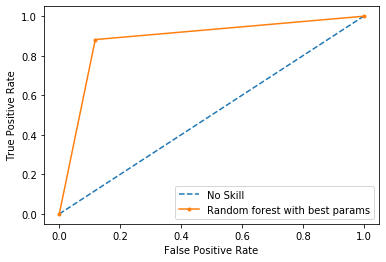

In [47]:
ns_probs = [0 for _ in range(len(ytest))]
m_probs = y_pred_1
ns_auc = roc_auc_score(ytest, ns_probs)
m_auc = roc_auc_score(ytest, m_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Randomforest: ROC AUC=%.3f' % (m_auc))
# calculate roc curves
ns_fpr, ns_tpr,_= roc_curve(ytest, ns_probs)
m_fpr, m_tpr,_=roc_curve(ytest, m_probs)
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(m_fpr, m_tpr, marker='.', label='Random forest with best params')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

The Insurance Claims- Fraud Detection model predicts with 87% accuracy

Saving the model

In [48]:
from joblib import dump
dump(model, 'Insurance_fraud_detection.joblib')

['Insurance_fraud_detection.joblib']

In [49]:
from joblib import load
loaded = load('Insurance_fraud_detection.joblib')